In [83]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb

from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [84]:
def cond(input):
    return "APARTMENTS" in input or "FAMILY" in input

In [85]:
df = pd.read_csv("nyc_sales_clean.csv")
df = df[df["BUILDING CLASS CATEGORY"].map(cond)]
print(df.shape)
print(df["BUILDING CLASS CATEGORY"].unique())
df.to_csv("nyc_sales_homes.csv", index=False)

/Users/tamir/miniconda2/envs/PointUp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(191120, 21)
['01  ONE FAMILY HOMES                        '
 '02  TWO FAMILY HOMES                        '
 '03  THREE FAMILY HOMES                      '
 '07  RENTALS - WALKUP APARTMENTS             '
 '08  RENTALS - ELEVATOR APARTMENTS           '
 '10  COOPS - ELEVATOR APARTMENTS             '
 '09  COOPS - WALKUP APARTMENTS               '
 '13  CONDOS - ELEVATOR APARTMENTS            '
 '01  ONE FAMILY DWELLINGS                    '
 '02  TWO FAMILY DWELLINGS                    '
 '03  THREE FAMILY DWELLINGS                  '
 '01 ONE FAMILY DWELLINGS                    '
 '02 TWO FAMILY DWELLINGS                    '
 '03 THREE FAMILY DWELLINGS                  '
 '07 RENTALS - WALKUP APARTMENTS             '
 '08 RENTALS - ELEVATOR APARTMENTS           '
 '09 COOPS - WALKUP APARTMENTS               '
 '10 COOPS - ELEVATOR APARTMENTS             ']


In [86]:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [87]:
cut_points = [1910, 1945, 1990]
labels = ["PRE PRE-WAR", "PRE-WAR", "POST-WAR", "MODERN"]
df["YEAR TYPE"] = binning(df["YEAR BUILT"], cut_points,labels)
print(pd.value_counts(df["YEAR TYPE"], sort=False))

df["BUILDING AGE"] = 2018 - df["YEAR BUILT"]

df.to_csv("nyc_sales_binned.csv", index=False)

PRE PRE-WAR    33788
PRE-WAR        95107
POST-WAR       41959
MODERN         20266
Name: YEAR TYPE, dtype: int64


In [88]:
data = pd.read_csv('nyc_sales_binned.csv')
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR TYPE,BUILDING AGE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3037,42,,A1,4428 PARK AVENUE,,...,1,3525,1340,1899,1,A1,287000,2010-12-10 00:00:00,PRE PRE-WAR,119
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,64,,A1,467 EAST 185 STREET,,...,1,1667,1296,1910,1,A1,150000,2010-04-20 00:00:00,PRE PRE-WAR,108
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,34,,A1,2085 BATHGATE AVENUE,,...,1,2060,1629,1899,1,A1,145915,2010-07-27 00:00:00,PRE PRE-WAR,119
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,42,,A1,2069 BATHGATE AVENUE,,...,1,1964,1424,1899,1,A1,72790,2010-06-03 00:00:00,PRE PRE-WAR,119
4,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,18,,A9,2184 BATHGATE AVENUE,,...,1,1768,1236,1930,1,A9,313300,2010-04-09 00:00:00,PRE-WAR,88
5,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,19,,A5,2186 BATHGATE AVENUE,,...,1,1768,1188,1901,1,A5,299000,2010-06-30 00:00:00,PRE PRE-WAR,117
6,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,19,,A5,2186 BATHGATE AVENUE,,...,1,1768,1188,1901,1,A5,132000,2010-02-23 00:00:00,PRE PRE-WAR,117
7,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,28,,A1,540 EAST 182 STREET,,...,1,1209,1048,1901,1,A1,272231,2010-10-04 00:00:00,PRE PRE-WAR,117
8,2,BATHGATE,02 TWO FAMILY HOMES,1,3030,60,,B3,4469 PARK AVENUE,,...,2,1542,1542,1899,1,B3,88218,2010-01-27 00:00:00,PRE PRE-WAR,119
9,2,BATHGATE,02 TWO FAMILY HOMES,1,3030,71,,B2,4443 PARK AVENUE,,...,2,2352,1632,1899,1,B2,280000,2010-02-23 00:00:00,PRE PRE-WAR,119


In [89]:
data["BOROUGH"] = data["BOROUGH"].astype('category')
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')
data["NEIGHBORHOOD"] = data["NEIGHBORHOOD"].astype('category')
data["BUILDING CLASS CATEGORY"] = data["BUILDING CLASS CATEGORY"].astype('category')
data["BUILDING CLASS AT PRESENT"] = data["BUILDING CLASS AT PRESENT"].astype('category')
data["BUILDING CLASS AT TIME OF SALE"] = data["BUILDING CLASS AT TIME OF SALE"].astype('category')

In [90]:
#remove duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [91]:
#check number of rows and columns
data.shape

(190699, 23)

In [92]:
data.corr()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
BLOCK,1.000000,0.038959,0.473909,-0.040559,-0.089891,-0.041447,0.003588,-0.039476,0.088689,-0.042278,-0.088689
LOT,0.038959,1.000000,-0.090810,-0.008401,-0.028698,-0.008708,0.003544,-0.008795,0.079750,-0.008311,-0.079750
ZIP CODE,0.473909,-0.090810,1.000000,-0.048019,-0.104358,-0.049040,-0.026182,-0.048245,-0.138520,-0.049154,0.138520
RESIDENTIAL UNITS,-0.040559,-0.008401,-0.048019,1.000000,0.380229,0.999931,0.659252,0.899368,-0.000108,0.784236,0.000108
COMMERCIAL UNITS,-0.089891,-0.028698,-0.104358,0.380229,1.000000,0.390553,0.312866,0.433772,-0.041225,0.386101,0.041225
TOTAL UNITS,-0.041447,-0.008708,-0.049040,0.999931,0.390553,1.000000,0.659968,0.900418,-0.000605,0.785232,0.000605
LAND SQUARE FEET,0.003588,0.003544,-0.026182,0.659252,0.312866,0.659968,1.000000,0.794457,0.015593,0.502908,-0.015593
GROSS SQUARE FEET,-0.039476,-0.008795,-0.048245,0.899368,0.433772,0.900418,0.794457,1.000000,0.004421,0.846223,-0.004421
YEAR BUILT,0.088689,0.079750,-0.138520,-0.000108,-0.041225,-0.000605,0.015593,0.004421,1.000000,-0.004863,-1.000000
SALE PRICE,-0.042278,-0.008311,-0.049154,0.784236,0.386101,0.785232,0.502908,0.846223,-0.004863,1.000000,0.004863


# CLEAN OUTLIERS

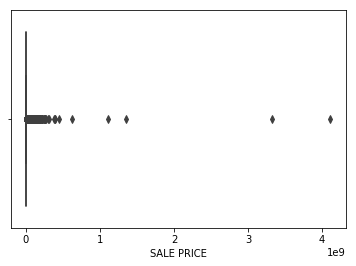

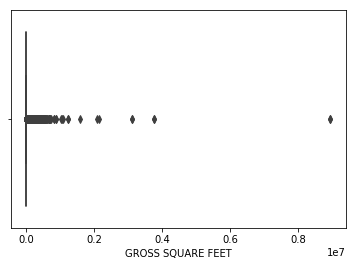

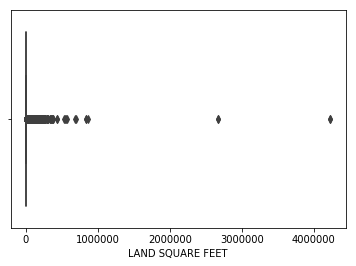

In [93]:
sns.boxplot(x="SALE PRICE", data=data)
plt.show()
sns.boxplot(x="GROSS SQUARE FEET", data=data)
plt.show()
sns.boxplot(x="LAND SQUARE FEET", data=data)
plt.show()

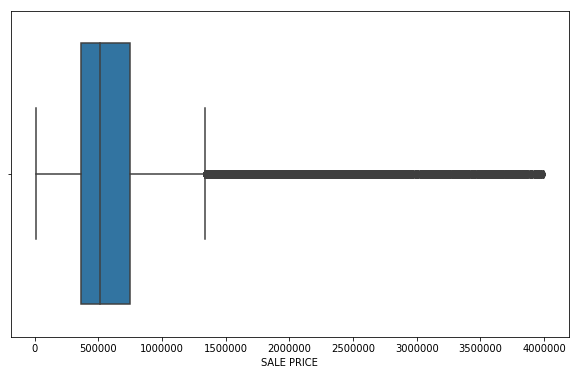

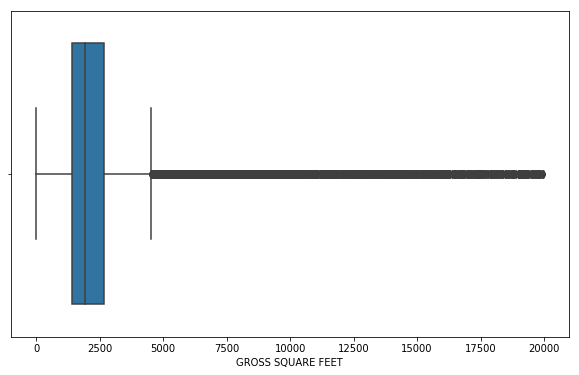

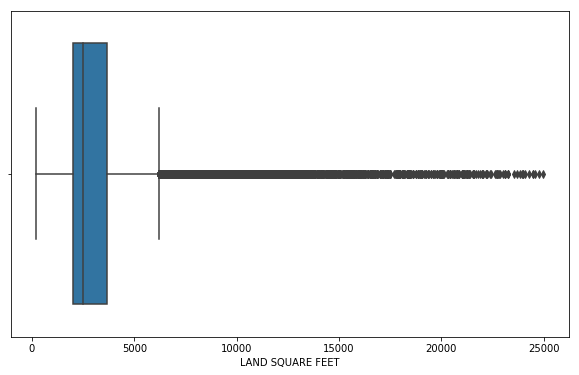

In [94]:
data = data[data["SALE PRICE"]<4000000]
data = data[data["GROSS SQUARE FEET"]<20000]
data = data[data["LAND SQUARE FEET"]<25000]
plt.figure(figsize=(10,6))
sns.boxplot(x="SALE PRICE", data=data)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="GROSS SQUARE FEET", data=data)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="LAND SQUARE FEET", data=data)
plt.show()

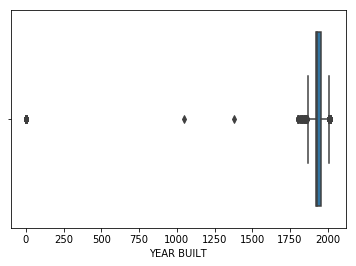

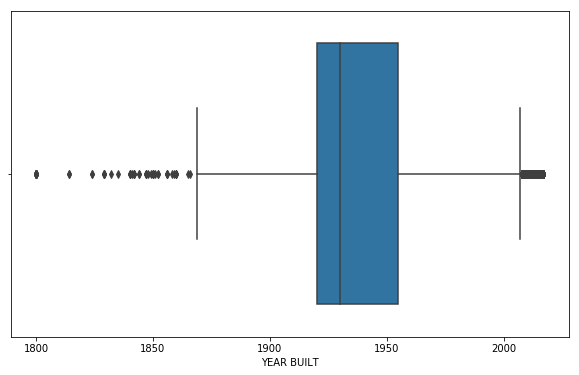

In [95]:
sns.boxplot(x="YEAR BUILT", data=data)
plt.show()
data = data[data["YEAR BUILT"]>1750]
plt.figure(figsize=(10,6))
sns.boxplot(x="YEAR BUILT", data=data)
plt.show()

In [96]:
data = data[data["TAX CLASS AT PRESENT"]!="4"]
data["TAX CLASS AT PRESENT"].value_counts()

1     170856
2A      7945
2B      2341
2       1894
2C        27
4          0
1D         0
Name: TAX CLASS AT PRESENT, dtype: int64

In [97]:
data.shape

(183063, 23)

/Users/tamir/miniconda2/envs/PointUp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


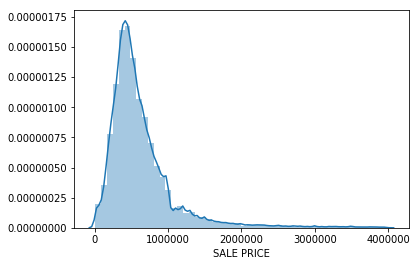

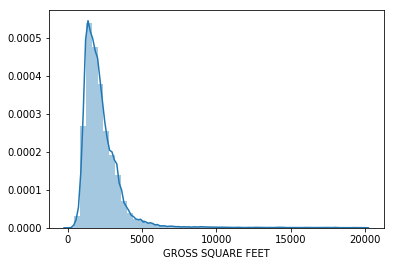

In [98]:
sns.distplot(data["SALE PRICE"])
plt.show()
sns.distplot(data["GROSS SQUARE FEET"])
plt.show()

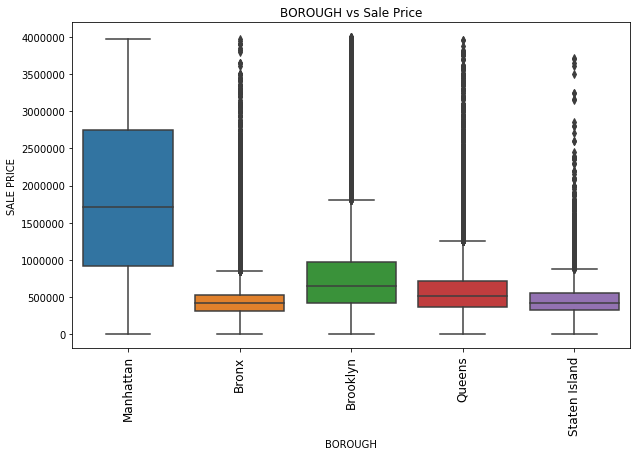

In [99]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
ax.set_xticklabels(["Manhattan","Bronx","Brooklyn","Queens","Staten Island"], rotation='vertical', fontsize = 12)
plt.title('BOROUGH vs Sale Price')
plt.show()

In [100]:
data = data.sample(frac=1).reset_index(drop=True)

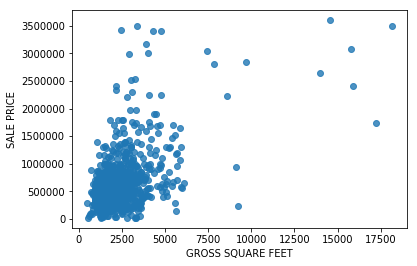

In [101]:
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=data.iloc[:1000], fit_reg=False)
plt.show()

In [102]:
data["NEIGHBORHOOD"].value_counts()

FLUSHING-NORTH               4865
BEDFORD STUYVESANT           4737
EAST NEW YORK                3118
BUSHWICK                     2838
SO. JAMAICA-BAISLEY PARK     2750
BAYSIDE                      2703
RICHMOND HILL                2637
ST. ALBANS                   2544
SOUTH JAMAICA                2472
BOROUGH PARK                 2334
GREAT KILLS                  2294
CANARSIE                     2228
QUEENS VILLAGE               2209
FLATBUSH-EAST                2205
SPRINGFIELD GARDENS          2144
CROWN HEIGHTS                2049
SOUTH OZONE PARK             1963
FLUSHING-SOUTH               1917
ASTORIA                      1862
OZONE PARK                   1834
BAY RIDGE                    1832
OCEAN HILL                   1727
HOLLIS                       1677
BENSONHURST                  1661
CORONA                       1646
WOODHAVEN                    1633
GRAVESEND                    1610
MIDDLE VILLAGE               1596
ELMHURST                     1582
SUNSET PARK   

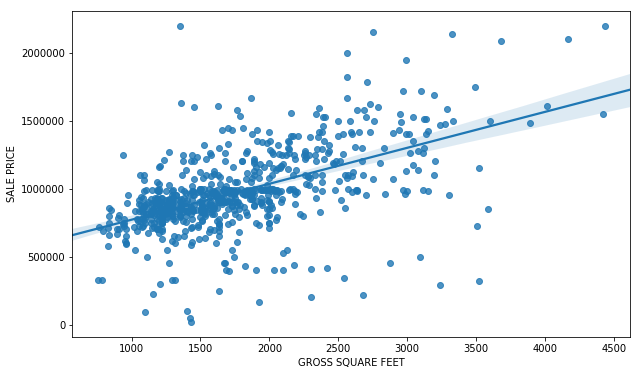

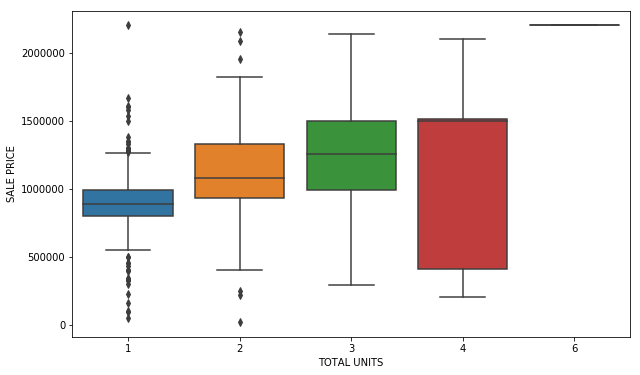

In [103]:
plt.figure(figsize=(10,6))
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="TOTAL UNITS", y="SALE PRICE", data=data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"])
plt.show()

correlation between TOTAL UNITS and RESIDENTIAL UNITS:  0.9946144865918709


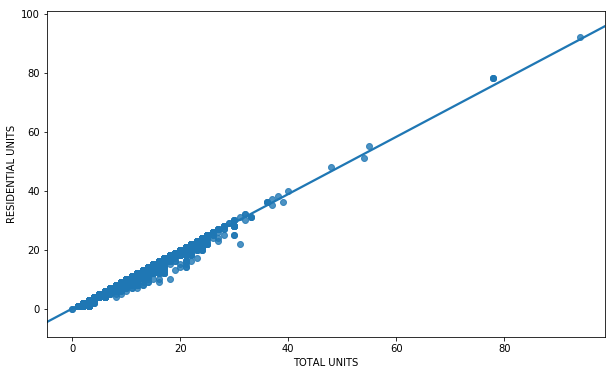

In [104]:
print("correlation between TOTAL UNITS and RESIDENTIAL UNITS: ", data["TOTAL UNITS"].corr(data["RESIDENTIAL UNITS"]))
plt.figure(figsize=(10,6))
sns.regplot(x="TOTAL UNITS", y="RESIDENTIAL UNITS", data=data)
plt.show()

In [105]:
data = data.drop(columns=["RESIDENTIAL UNITS"])

In [106]:
data = data.drop(columns=["EASE-MENT"])

In [107]:
data = data.drop(columns=["ZIP CODE"])

In [108]:
data.describe()

,BLOCK,LOT,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
count,183063.000000,183063.000000,183063.00000,183063.000000,183063.000000,183063.000000,183063.000000,1.830630e+05,183063.000000
mean,5714.144136,61.498861,0.03542,2.029301,2962.511966,2272.436178,1939.967241,6.324367e+05,78.032759
std,3769.746322,118.343098,0.21627,2.043099,1682.437771,1537.946246,30.391108,4.826735e+05,30.391108
min,3.000000,1.000000,0.00000,0.000000,200.000000,1.000000,1800.000000,1.000100e+04,1.000000
25%,2858.000000,20.000000,0.00000,1.000000,2000.000000,1430.000000,1920.000000,3.600000e+05,63.000000
50%,5124.000000,39.000000,0.00000,2.000000,2500.000000,1935.000000,1930.000000,5.100000e+05,88.000000
75%,7988.000000,64.000000,0.00000,2.000000,3684.000000,2673.000000,1955.000000,7.500000e+05,98.000000
max,16322.000000,4336.000000,9.00000,94.000000,24989.000000,19969.000000,2017.000000,3.995000e+06,218.000000


In [109]:
queens = data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"]
queens.corr()

,BLOCK,LOT,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
BLOCK,1.000000,-0.044041,0.008591,-0.007246,-0.159227,-0.092249,0.047383,-0.059082,-0.047383
LOT,-0.044041,1.000000,0.279405,0.049669,-0.153088,0.063699,0.004655,-0.025708,-0.004655
COMMERCIAL UNITS,0.008591,0.279405,1.000000,0.153734,-0.098318,0.125586,0.006936,0.032455,-0.006936
TOTAL UNITS,-0.007246,0.049669,0.153734,1.000000,-0.150309,0.634956,0.273723,0.404830,-0.273723
LAND SQUARE FEET,-0.159227,-0.153088,-0.098318,-0.150309,1.000000,0.112296,-0.173303,0.250613,0.173303
GROSS SQUARE FEET,-0.092249,0.063699,0.125586,0.634956,0.112296,1.000000,0.240585,0.548497,-0.240585
YEAR BUILT,0.047383,0.004655,0.006936,0.273723,-0.173303,0.240585,1.000000,0.172484,-1.000000
SALE PRICE,-0.059082,-0.025708,0.032455,0.404830,0.250613,0.548497,0.172484,1.000000,-0.172484
BUILDING AGE,-0.047383,-0.004655,-0.006936,-0.273723,0.173303,-0.240585,-1.000000,-0.172484,1.000000


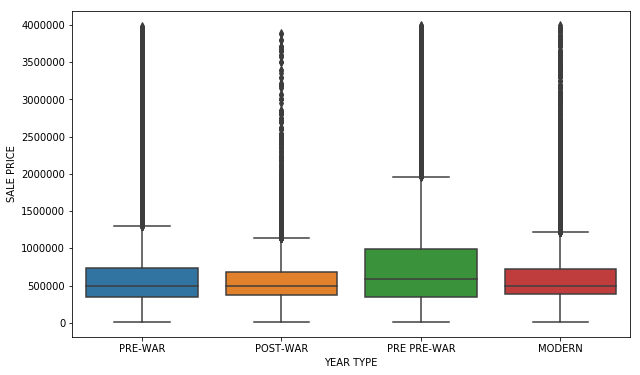

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x="YEAR TYPE", y="SALE PRICE", data=data)
plt.show()

In [111]:
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR TYPE,BUILDING AGE
0,3,GRAVESEND,02 TWO FAMILY HOMES,1,6916,89,B1,119 28TH AVENUE,,0,2,1933,2816,1930,1,B1,180000,2010-03-04,PRE-WAR,88
1,4,LAURELTON,01 ONE FAMILY HOMES,1,12864,33,A2,121-17 237TH STREET,,0,1,3977,954,1950,1,A2,256900,2010-12-03,POST-WAR,68
2,2,BELMONT,03 THREE FAMILY HOMES,1,3113,39,C0,2293 SOUTHERN BOULEVARD,,0,3,2974,5100,1925,1,C0,415000,2011-02-07,PRE-WAR,93
3,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4893,38,A9,3905 SNYDER,,0,1,1200,1200,1920,1,A9,410000,2016-12-30,PRE-WAR,98
4,4,RIDGEWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3555,20,C3,1622 SUMMERFIELD ST,,0,4,2500,3210,1931,2,C3,1203000,2015-11-09,PRE-WAR,87
5,4,FLORAL PARK,01 ONE FAMILY DWELLINGS,1,8712,27,A2,80-11 256 STREET,,0,1,4000,1134,1950,1,A2,470000,2013-02-22,POST-WAR,68
6,4,ST. ALBANS,01 ONE FAMILY DWELLINGS,1,10312,66,A1,114-78 178 PLACE,,0,1,6000,2052,1955,1,A1,475000,2013-10-28,POST-WAR,63
7,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY HOMES,1,5408,20,A1,756 EAST 2ND STREET,,0,1,3750,1720,1930,1,A1,700000,2012-08-21,PRE-WAR,88
8,4,RIDGEWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3486,61,C2,2017 PALMETTO STREET,,0,6,2742,5600,1930,2,C2,1512500,2017-06-23,PRE-WAR,88
9,3,EAST NEW YORK,07 RENTALS - WALKUP APARTMENTS,2A,4306,48,C3,765 HENDRIX STREET,,0,4,2450,3080,1930,2,C3,695000,2016-12-22,PRE-WAR,88


In [112]:
data.to_csv("binned_clean.csv")

In [113]:
data = pd.read_csv("binned_clean.csv")
print(data.dtypes)

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   int64
GROSS SQUARE FEET                  int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         int64
SALE DATE                         object
YEAR TYPE                         object
BUILDING AGE                       int64
dtype: object


In [114]:
def col_onehot_encoding(col):
    global data
    prefix = col.lower().replace(" ","_")
    data = pd.concat([data, pd.get_dummies(data[col], prefix=prefix)], axis=1)
    data.drop([col], axis=1, inplace=True)

In [115]:
cols = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT",\
        "BUILDING CLASS AT TIME OF SALE", "YEAR TYPE", "TAX CLASS AT TIME OF SALE"]

for col in cols:
    col_onehot_encoding(col)
print(data.dtypes)

data["SALE DATE"] = data["SALE DATE"].apply(lambda date: date.split("-")[0]).astype(int) #this is temporary

Unnamed: 0                                 int64
BLOCK                                      int64
LOT                                        int64
ADDRESS                                   object
APARTMENT NUMBER                          object
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
SALE PRICE                                 int64
SALE DATE                                 object
BUILDING AGE                               int64
borough_1                                  uint8
borough_2                                  uint8
borough_3                                  uint8
borough_4                                  uint8
borough_5                                  uint8
neighborhood_AIRPORT LA GUARDIA            uint8
neighborhood_AIRPORT LA GUARDIA            uint8
neighborhood_ALPHABE

In [116]:
train_data, test_data = train_test_split(data, test_size=0.3)
test_data, validation_data = train_test_split(test_data, test_size=0.5)
print("data size:", data.shape)
print("test size: ", test_data.shape)
print("train size: ", train_data.shape)
print("validation size: ", validation_data.shape)

data size: (183063, 595)
test size:  (27459, 595)
train size:  (128144, 595)
validation size:  (27460, 595)


In [117]:
train_cols = list(train_data.columns.values)
train_cols.remove("SALE PRICE")
train_cols.remove("Unnamed: 0")
train_cols.remove("ADDRESS") #temporery
train_cols.remove("APARTMENT NUMBER") #temperary

In [118]:
X = train_data.loc[:,train_cols]
Y = train_data.loc[:,["SALE PRICE"]]

validation_X = validation_data.loc[:, train_cols]
validation_Y = validation_data.loc[:, ["SALE PRICE"]].astype(int)

test_X = test_data.loc[:, train_cols]
test_Y = test_data.loc[:, ["SALE PRICE"]].astype(int)

In [119]:
#data["SALE DATE"] = data["SALE DATE"].apply(lambda date: date.split("-")[0]) #this is temporary

In [120]:
def measure_acc(y_pred, y):
    #print(y)
    #print(y_pred)
    s = 0
    percentage = 0.1
    for i in range(y.shape[0]):
        pred = y_pred[i]
        real = y["SALE PRICE"].iloc[i]
        if float(pred)/real <1+percentage and float(pred)/real >1-percentage:
            s+=1
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mean_abs_err = mean_absolute_error(y, y_pred)
    print("number of samples in validatoin set: ", y.shape[0])
    print("number of predictions within percentage: ", s)
    print("ratio of predictoin within percentage: ", float(s)/y.shape[0])
    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Error: ", mean_abs_err)

## Linear Regression

In [121]:
linreg = LinearRegression()
linreg.fit(X, Y["SALE PRICE"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
pred_y = linreg.predict(validation_X)
measure_acc(pred_y, validation_Y)

number of samples in validatoin set:  27460
number of predictions within percentage:  7615
ratio of predictoin within percentage:  0.2773124544792425
Root Mean Squared Error:  438017424.63595784
Mean Absolute Error:  6468456.809249818


## Ridge Regression

In [123]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X,Y["SALE PRICE"])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
pred_y = ridge.predict(validation_X)
measure_acc(pred_y, validation_Y)

number of samples in validatoin set:  27460
number of predictions within percentage:  7606
ratio of predictoin within percentage:  0.2769847050254916
Root Mean Squared Error:  300828.3382856221
Mean Absolute Error:  178244.17261655035


## Lasso Regression

In [125]:
lasso = Lasso(alpha=1)
lasso.fit(X,Y["SALE PRICE"])

/Users/tamir/miniconda2/envs/PointUp/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
pred_y = lasso.predict(validation_X)
measure_acc(pred_y, validation_Y)

number of samples in validatoin set:  27460
number of predictions within percentage:  7611
ratio of predictoin within percentage:  0.2771667880553532
Root Mean Squared Error:  300868.4374417629
Mean Absolute Error:  178253.3992089409


## Elastic Net

In [127]:
elastic_net = ElasticNet()
elastic_net.fit(X, Y["SALE PRICE"])

KeyboardInterrupt: 

In [ ]:
pred_y = elastic_net.predict(validation_X)
measure_acc(pred_y, validation_Y)

## Random Forest

In [ ]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X, Y["SALE PRICE"])

In [ ]:
pred_y = rand_forest.predict(validation_X)
print("R^2: ", rand_forest.score(validation_X, validation_Y))
measure_acc(pred_y, validation_Y)

## XGBoost

In [ ]:
xgdmat=xgb.DMatrix(X,Y["SALE PRICE"])
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params, xgdmat)

In [ ]:
tesdmat=xgb.DMatrix(validation_X)
y_pred=final_gb.predict(tesdmat)
print(y_pred)